In [1]:
!pip install -q gdown

!gdown --folder --remaining-ok https://drive.google.com/drive/folders/1NADy3RRIFPnQZLmsVBsf_Q6QV_mPqe51

import numpy as np

Retrieving folder contents
Processing file 1GQGiQEs78Tv3T2eHUUHAeCY6SPepRk5N X.npy
Processing file 1MMzJRp29SD7lC6ThoCLN3sJ53ckAfe15 y_freshness.npy
Processing file 1ULau1qx4ZBJntmM3dd0dIWv3hdJsAcue y_fruit.npy
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1GQGiQEs78Tv3T2eHUUHAeCY6SPepRk5N
From (redirected): https://drive.google.com/uc?id=1GQGiQEs78Tv3T2eHUUHAeCY6SPepRk5N&confirm=t&uuid=b78f5b6e-d90b-42dd-a6df-581a03f3c2ed
To: /content/Fresh_Rotten_Fruit_Dataset/X.npy
100% 722M/722M [00:12<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MMzJRp29SD7lC6ThoCLN3sJ53ckAfe15
To: /content/Fresh_Rotten_Fruit_Dataset/y_freshness.npy
100% 118k/118k [00:00<00:00, 12.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ULau1qx4ZBJntmM3dd0dIWv3hdJsAcue
To: /content/Fresh_Rotten_Fruit_Dataset/y_fruit.npy
100% 118k/118k [00:00<00:00, 6.85MB/s]
Download

FileNotFoundError: [Errno 2] No such file or directory: 'X.npy'

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split


In [7]:
X = np.load("Fresh_Rotten_Fruit_Dataset/X.npy")
y_fruit = np.load("Fresh_Rotten_Fruit_Dataset/y_fruit.npy")
y_freshness = np.load("Fresh_Rotten_Fruit_Dataset/y_freshness.npy")

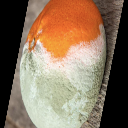

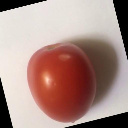

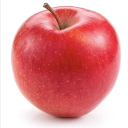

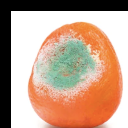

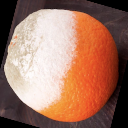

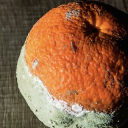

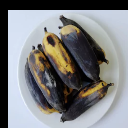

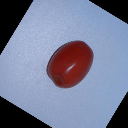

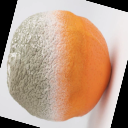

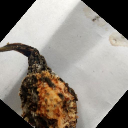

In [8]:

for i in range(10):
  idx = np.random.randint(0, X.shape[0])
  cv2_imshow(X[idx])



In [9]:
x_train, x_test, y_freshness_train, y_freshness_test, y_fruit_train, y_fruit_test = train_test_split(
    X, y_freshness, y_fruit, test_size=0.2, random_state=42, stratify=y_fruit
)



from tensorflow.keras.utils import to_categorical

y_freshness_train = to_categorical(y_freshness_train)
y_freshness_test  = to_categorical(y_freshness_test)

y_fruit_train = to_categorical(y_fruit_train)
y_fruit_test  = to_categorical(y_fruit_test)

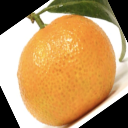

None


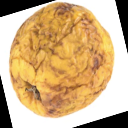

None


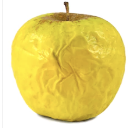

None


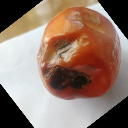

None


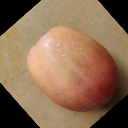

None


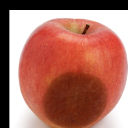

None


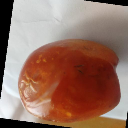

None


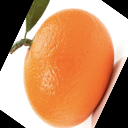

None


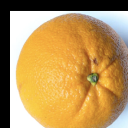

None


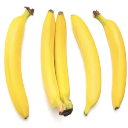

None


In [10]:
for _ in range(10):
  idx = np.random.randint(0, x_train.shape[0])
  print(cv2_imshow(x_train[idx]))

In [11]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import CategoricalCrossentropy

In [13]:
input_shape = (128, 128, 3)

n_fruits_classes = 6
n_freshness_classes = 2

inputs = Input(shape=input_shape)

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.2)(x)

fruit_output = Dense(n_fruits_classes, activation='softmax', name='fruit_output')(x)
freshness_output = Dense(n_freshness_classes, activation='softmax', name='freshness_output')(x)


model = Model(inputs=inputs, outputs=[fruit_output, freshness_output])
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'fruit_output': 'categorical_crossentropy',
        'freshness_output': 'categorical_crossentropy'
    },
    metrics={
        'fruit_output': 'accuracy',
        'freshness_output': 'accuracy'
    }
)

model.summary()

history = model.fit(
    x_train,
    {
        'fruit_output': y_fruit_train,
        'freshness_output': y_freshness_train
    },
    validation_data=(
        x_test,
        {
            'fruit_output': y_fruit_test,
            'freshness_output': y_freshness_test
        }
    ),
    epochs=10,
    batch_size=32
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 128, 128,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 128, 128,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 128, 128,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 129, 129,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 64, 64,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 64, 64,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 64, 64,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 64, 64,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │        512 │ block1a_se_excit

 Total params: 4,059,819 (15.49 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 338s 886ms/step - freshness_output_accuracy: 0.6066 - freshness_output_loss: 0.6681 - fruit_output_accuracy: 0.4715 - fruit_output_loss: 1.3997 - loss: 2.0678 - val_freshness_output_accuracy: 0.8686 - val_freshness_output_loss: 0.3839 - val_fruit_output_accuracy: 0.9207 - val_fruit_output_loss: 0.4941 - val_loss: 0.8779
Epoch 2/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 378s 873ms/step - freshness_output_accuracy: 0.8572 - freshness_output_loss: 0.3740 - fruit_output_accuracy: 0.9076 - fruit_output_loss: 0.4571 - loss: 0.8311 - val_freshness_output_accuracy: 0.9088 - val_freshness_output_loss: 0.2813 - val_fruit_output_accuracy: 0.9591 - val_fruit_output_loss: 0.2698 - val_loss: 0.5513
Epoch 3/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 323s 876ms/step - freshness_output_accuracy: 0.8943 - freshness_output_loss: 0.2848 - fruit_output_accuracy: 0.9410 - fruit_output_loss: 0.2842 - loss: 0.5690 - val_freshness_output_accuracy: 0.9234 - val_freshness_output_loss: 0.2373 -

In [14]:
import json

fruit_label2id = {
    "apple": 0,
    "banana": 1,
    "bittergourd": 2,
    "capsicum": 3,
    "orange": 4,
    "tomato": 5
}
id2fruit_label = {v: k for k, v in fruit_label2id.items()}

with open("id2fruit_label.json", "w") as f:
    json.dump(id2fruit_label, f)



freshness_ib2label= {
    0: "fresh",
    1: "rotten"
}
with open("freshness_id2label.json", "w") as f:
    json.dump(freshness_ib2label, f)

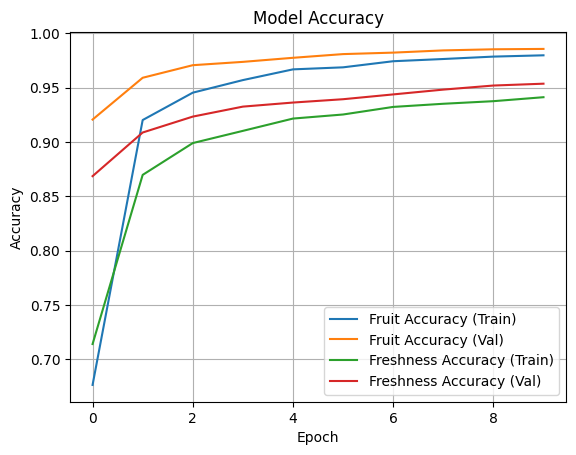

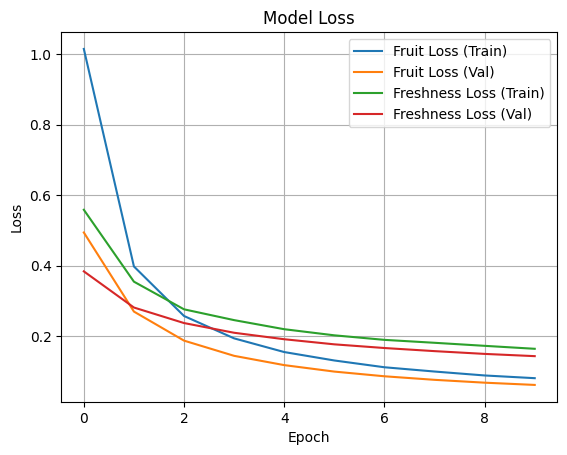

In [16]:
plt.plot(history.history['fruit_output_accuracy'], label='Fruit Accuracy (Train)')
plt.plot(history.history['val_fruit_output_accuracy'], label='Fruit Accuracy (Val)')
plt.plot(history.history['freshness_output_accuracy'], label='Freshness Accuracy (Train)')
plt.plot(history.history['val_freshness_output_accuracy'], label='Freshness Accuracy (Val)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['fruit_output_loss'], label='Fruit Loss (Train)')
plt.plot(history.history['val_fruit_output_loss'], label='Fruit Loss (Val)')
plt.plot(history.history['freshness_output_loss'], label='Freshness Loss (Train)')
plt.plot(history.history['val_freshness_output_loss'], label='Freshness Loss (Val)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [17]:
model.save('fruit_freshness_model.h5')

In [33]:
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    return np.expand_dims(img, axis=0)

In [37]:
with open("id2fruit_label.json", "r") as f:
    fruit_dict = json.load(f)

with open("freshness_id2label.json", "r") as f:
    freshness_dict = json.load(f)


def predict(img_1):
  cv2_imshow(img_1)
  img = preprocess_image(img_1)
  cv2_imshow(img[0])

  pred_fruit, pred_freshness = model.predict(img)
  fruit_label = np.argmax(pred_fruit)
  freshness_label = np.argmax(pred_freshness)
  print("Fruit:", fruit_dict[str(fruit_label)])
  print("Freshness:", freshness_dict[str(freshness_label)])


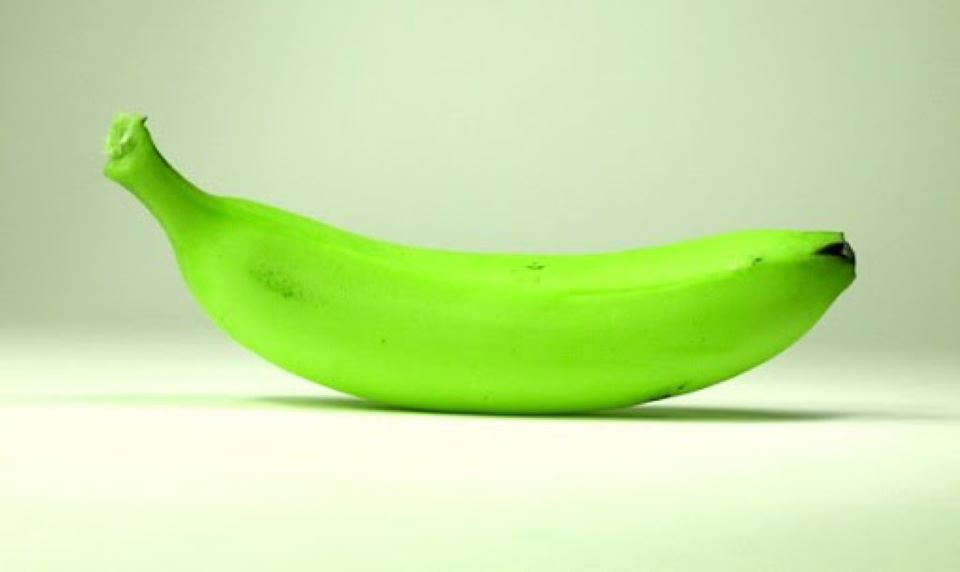

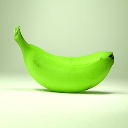

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Fruit: banana
Freshness: fresh


In [38]:
img = cv2.imread('3.jpg')
predict(img)

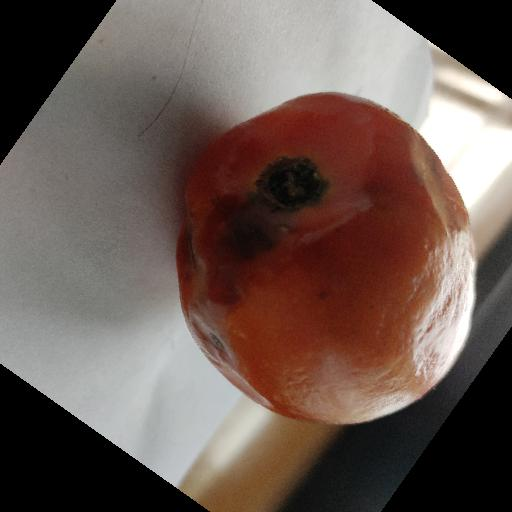

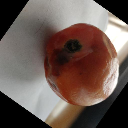

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Fruit: tomato
Freshness: rotten


In [47]:
img = cv2.imread("test.jpg")
predict(img)